Importing the Dependencies

In [2]:
import warnings as wrn
wrn.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
# loading the dataset to a Pandas DataFrame
cc_data = pd.read_csv('creditcard.csv', on_bad_lines='skip')

In [5]:
# first 5 rows of the dataset
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
cc_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
# dataset informations
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# checking the number of missing values in each column
cc_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# distribution of legit transactions & fraudulent transactions
cc_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

*This Dataset is highly unblanced*

0 --> Normal Transaction

1 --> fraudulent transaction

In [12]:
# separating the data for analysis
legit_transaction = cc_data[cc_data.Class == 0]
fraud_transaction = cc_data[cc_data.Class == 1]

In [13]:
print(legit_transaction.shape)
print(fraud_transaction.shape)

(284315, 31)
(492, 31)


In [14]:
# statistical measures of the data
legit_transaction.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud_transaction.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
# compare the values for both transactions
cc_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


*Under-Sampling*

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [20]:
legit_sample = legit_transaction.sample(n=492)

Concatenating two DataFrames

In [22]:
new_data = pd.concat([legit_sample, fraud_transaction], axis=0)

In [23]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
270743,164237.0,-3.485965,-0.789271,0.431560,-0.115639,1.296295,-1.345019,-1.091087,1.094450,-0.339463,...,-0.522989,-1.820420,-0.867515,-0.458989,0.098110,-0.104366,0.517889,-0.606031,1.00,0
204936,135511.0,1.744308,-0.845910,-0.582428,0.254837,-0.722419,-0.290578,-0.446905,0.074010,0.916800,...,-0.167903,-0.740817,0.292880,-0.367347,-0.712569,0.222811,-0.073118,-0.037381,131.96,0
97535,66261.0,0.877129,-0.913132,0.935806,0.326365,-1.196667,0.128565,-0.558175,0.177112,1.246201,...,-0.119761,-0.411337,-0.017732,0.157413,-0.005635,0.957158,-0.048375,0.036343,159.08,0
5935,6555.0,-0.341438,1.154901,1.492085,2.532310,0.752505,0.183552,1.102440,-0.190711,-0.455538,...,0.017346,0.311575,-0.051749,0.135472,-0.332574,0.065442,-0.089165,-0.095632,53.73,0
241712,151147.0,0.082394,0.836621,-0.000603,-0.756203,0.783839,-0.642273,0.981196,-0.137425,0.000083,...,-0.300266,-0.675589,-0.009851,-0.720758,-0.410273,0.186775,0.249438,0.089854,3.08,0


In [24]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [25]:
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [26]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95355.577236,0.130169,-0.113291,0.059438,-0.073837,-0.113503,-0.005125,-0.032959,-0.023227,-0.017604,...,0.001027,0.007893,-0.037936,0.002646,0.027926,-0.026112,0.017695,0.000769,0.007285,96.637337
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


*Visualisations*

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
sns.set_theme(style="whitegrid")

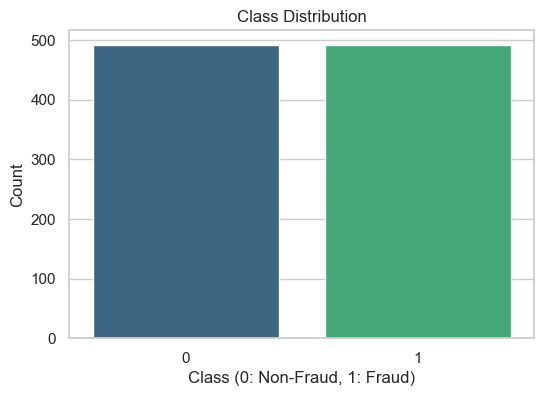

In [30]:
# 1. Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=new_data, x='Class', palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

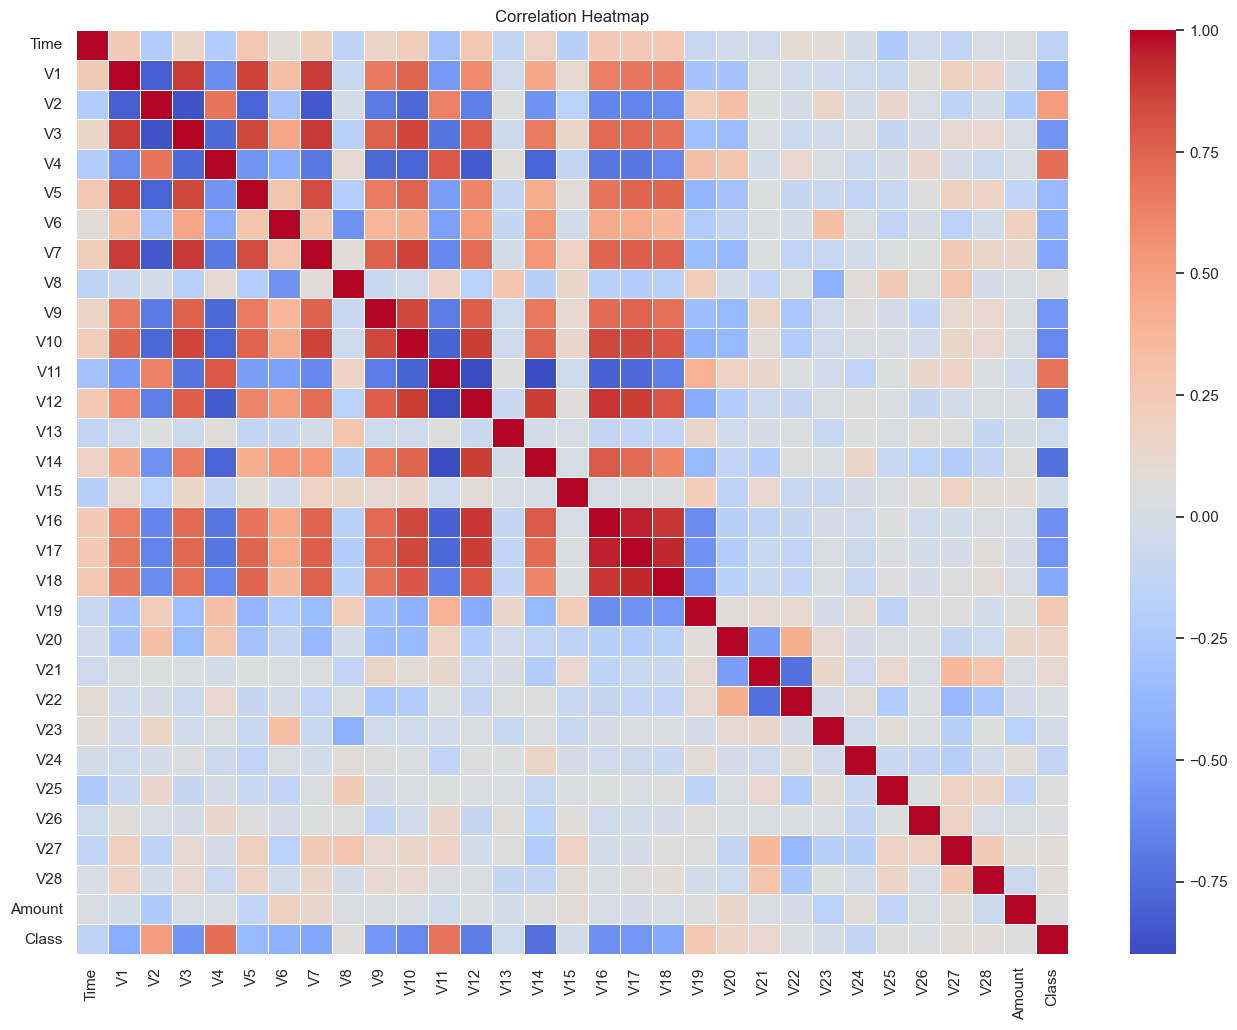

In [31]:
# 2. Correlation Heatmap
plt.figure(figsize=(16, 12))
corr = new_data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

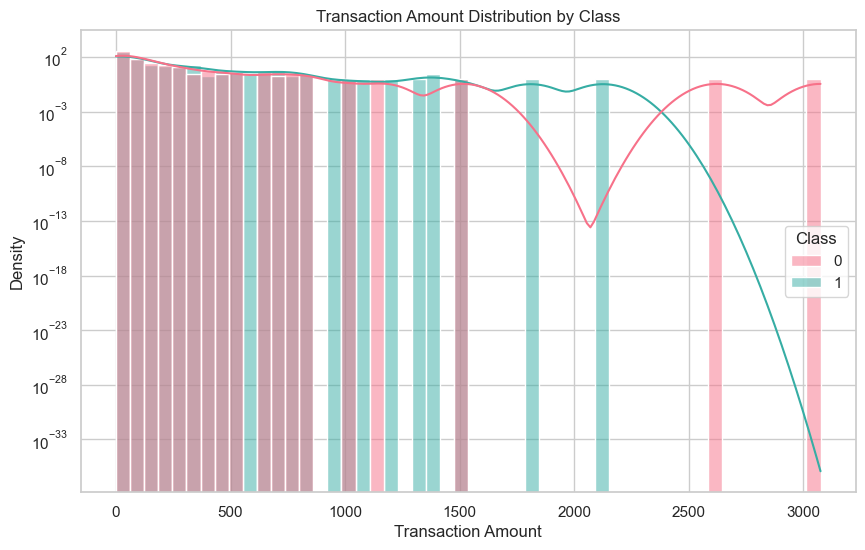

In [32]:
# 3. Distribution of Transaction Amounts by Class
plt.figure(figsize=(10, 6))
sns.histplot(data=new_data, x='Amount', hue='Class', kde=True, bins=50, palette='husl')
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.yscale('log')
plt.show()

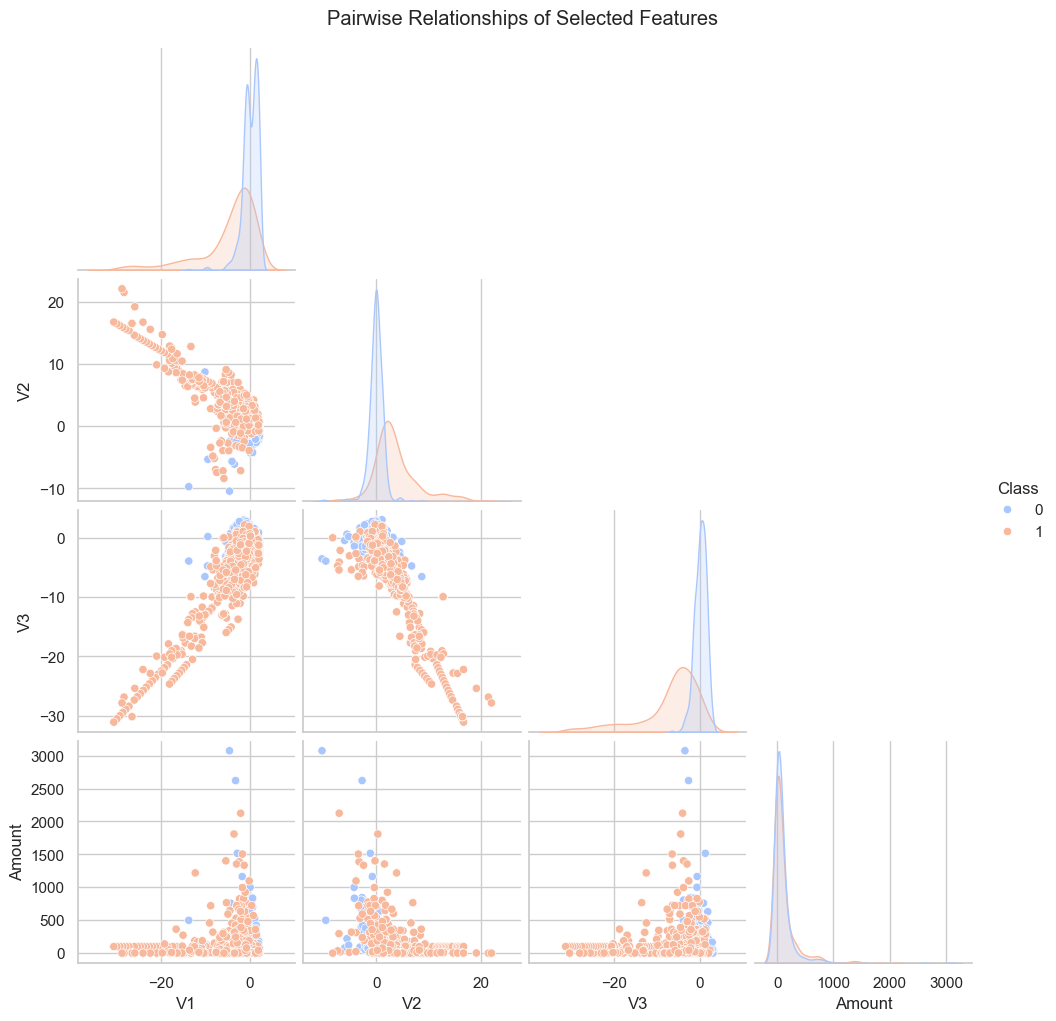

In [33]:
# 4. Pairwise Relationship Plot for Selected Features
selected_features = ['V1', 'V2', 'V3', 'Amount', 'Class']
sns.pairplot(new_data[selected_features], hue='Class', palette='coolwarm', diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships of Selected Features', y=1.02)
plt.show()

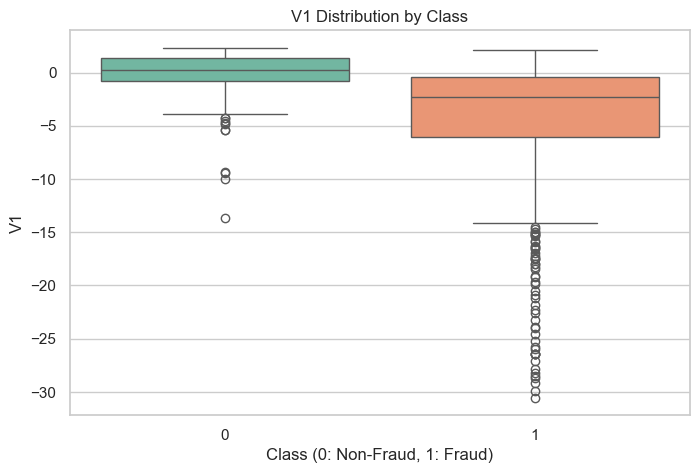

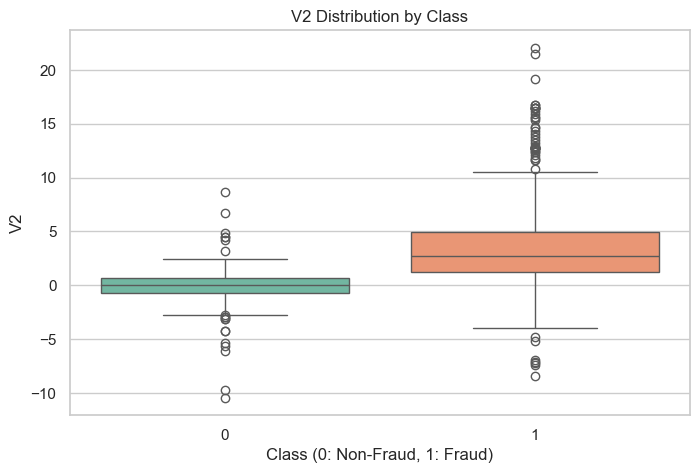

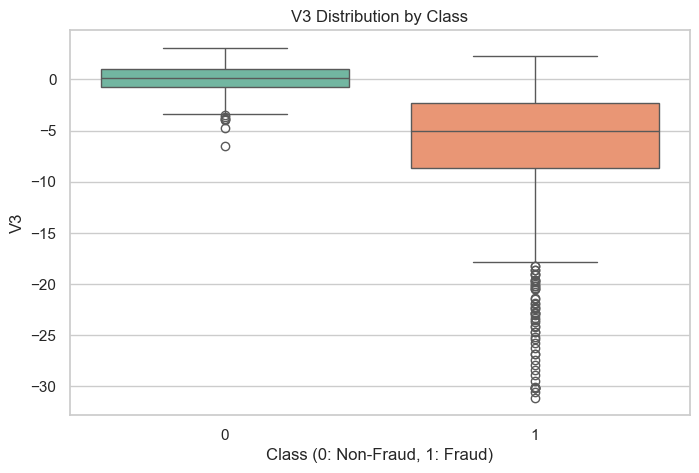

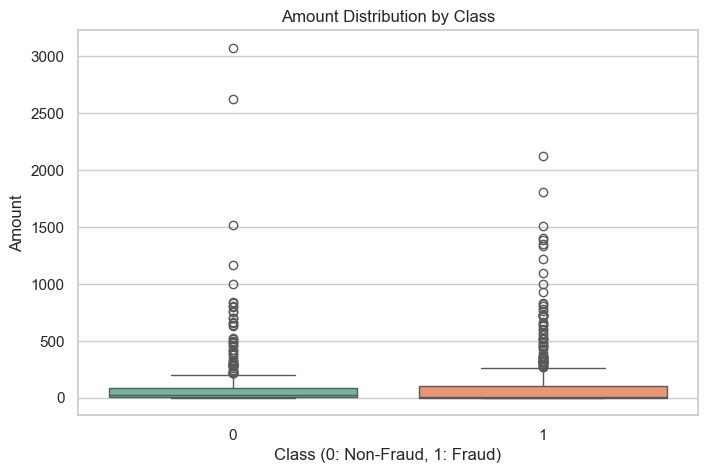

In [34]:
# 5. Boxplots for Specific Features by Class
features_to_plot = ['V1', 'V2', 'V3', 'Amount']
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=new_data, x='Class', y=feature, palette='Set2')
    plt.title(f'{feature} Distribution by Class')
    plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
    plt.ylabel(feature)
    plt.show()

*Splitting the data into Features & Targets*

In [36]:
X = new_data.drop(columns='Class', axis=1)
Y = new_data['Class']

In [37]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
270743  164237.0 -3.485965 -0.789271  0.431560 -0.115639  1.296295 -1.345019   
204936  135511.0  1.744308 -0.845910 -0.582428  0.254837 -0.722419 -0.290578   
97535    66261.0  0.877129 -0.913132  0.935806  0.326365 -1.196667  0.128565   
5935      6555.0 -0.341438  1.154901  1.492085  2.532310  0.752505  0.183552   
241712  151147.0  0.082394  0.836621 -0.000603 -0.756203  0.783839 -0.642273   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [38]:
print(Y)

270743    0
204936    0
97535     0
5935      0
241712    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

*Decision Tree*

In [44]:
# 1. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
# Predictions and evaluation
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Classifier")
print(confusion_matrix(Y_test, dt_predictions))
print(classification_report(Y_test, dt_predictions))
print("Accuracy:", accuracy_score(Y_test, dt_predictions))

Decision Tree Classifier
[[89 10]
 [13 85]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        99
           1       0.89      0.87      0.88        98

    accuracy                           0.88       197
   macro avg       0.88      0.88      0.88       197
weighted avg       0.88      0.88      0.88       197

Accuracy: 0.883248730964467


In [46]:
# 2. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Predictions and evaluation
rf_predictions = rf_model.predict(X_test)
print("\nRandom Forest Classifier")
print(confusion_matrix(Y_test, rf_predictions))
print(classification_report(Y_test, rf_predictions))
print("Accuracy:", accuracy_score(Y_test, rf_predictions))


Random Forest Classifier
[[93  6]
 [13 85]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        99
           1       0.93      0.87      0.90        98

    accuracy                           0.90       197
   macro avg       0.91      0.90      0.90       197
weighted avg       0.91      0.90      0.90       197

Accuracy: 0.9035532994923858


*K-means clustering*

In [49]:
# 3. K-Means Clustering
kmeans_model = KMeans(n_clusters=2, random_state=42)  # 2 clusters: Fraud and Non-Fraud
kmeans_model.fit(X)

kmeans_labels = kmeans_model.labels_

In [50]:
# Evaluating clustering with adjusted metrics (optional, requires Y labels)
from sklearn.metrics import adjusted_rand_score
print("\nK-Means Clustering")
print("Adjusted Rand Index (Clustering vs True Labels):", adjusted_rand_score(Y, kmeans_labels))


K-Means Clustering
Adjusted Rand Index (Clustering vs True Labels): 0.005284189437095867


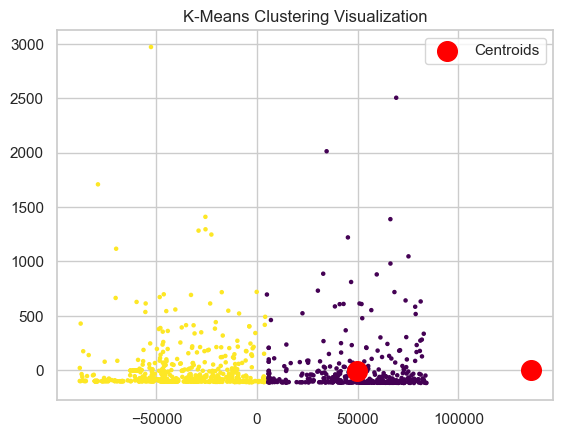

In [51]:
# Visualizing cluster centers (optional for feature reduction)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=5)
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-Means Clustering Visualization')
plt.legend()
plt.show()

In [52]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

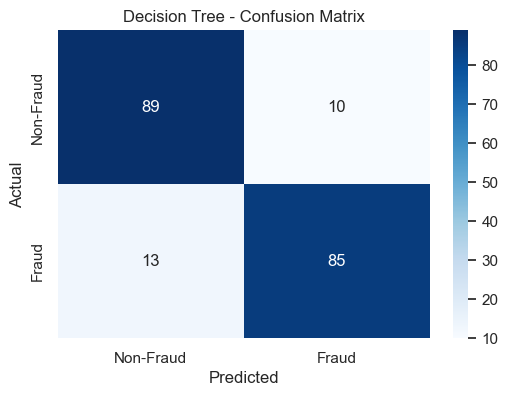

In [53]:
# Decision Tree Confusion Matrix
plot_confusion_matrix(Y_test, dt_predictions, "Decision Tree")

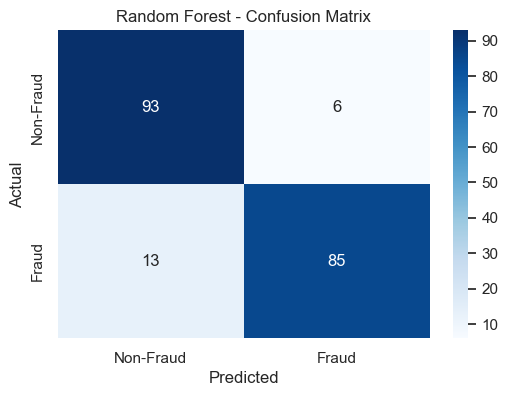

In [54]:
# Random Forest Confusion Matrix
plot_confusion_matrix(Y_test, rf_predictions, "Random Forest")

In [55]:
from sklearn.ensemble import IsolationForest

In [56]:
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Adjust contamination to match fraud percentage
iso_forest.fit(X)

IsolationForest(contamination=0.01, random_state=42)

In [57]:
# Predictions (1 = normal, -1 = anomaly)
iso_predictions = iso_forest.predict(X)

In [58]:
# Confusion matrix and classification report
print("Isolation Forest Results")
print(confusion_matrix(Y, iso_predictions))
print(classification_report(Y, iso_predictions))

Isolation Forest Results
[[  0   0   0]
 [  0   0 492]
 [  6   0 486]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       492
           1       0.50      0.99      0.66       492

    accuracy                           0.49       984
   macro avg       0.17      0.33      0.22       984
weighted avg       0.25      0.49      0.33       984



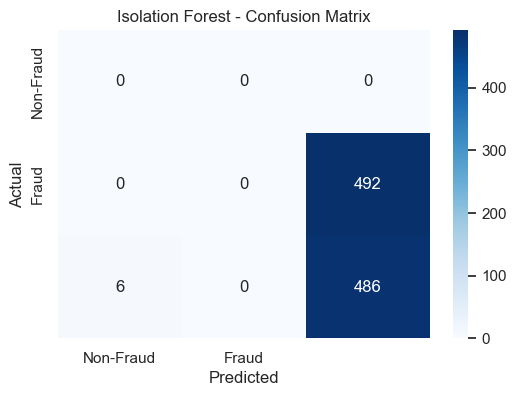

In [59]:
# Visualizing Confusion Matrix
plot_confusion_matrix(Y, iso_predictions, "Isolation Forest")

In [115]:
# Metrics Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("-" * 40)

In [117]:
# Evaluate Decision Tree
evaluate_model(Y_test, dt_predictions, "Decision Tree")

# Evaluate Random Forest
evaluate_model(Y_test, rf_predictions, "Random Forest")

Evaluation Metrics for Decision Tree
Accuracy: 0.8832
----------------------------------------
Evaluation Metrics for Random Forest
Accuracy: 0.9036
----------------------------------------


In [119]:
# Plot Feature Importance
def plot_feature_importance(model, feature_names, model_name):
    feature_importance = model.feature_importances_
    sorted_idx = feature_importance.argsort()

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.title(f"{model_name} - Feature Importance")
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.show()

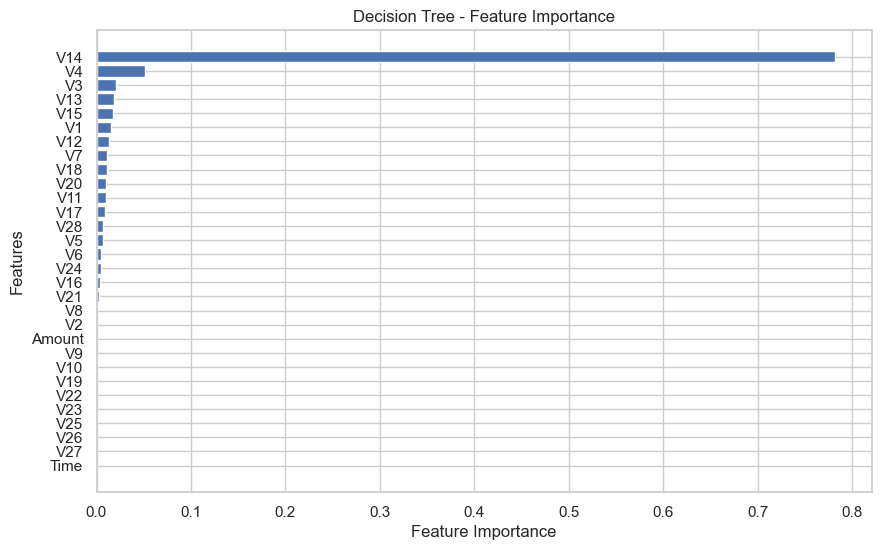

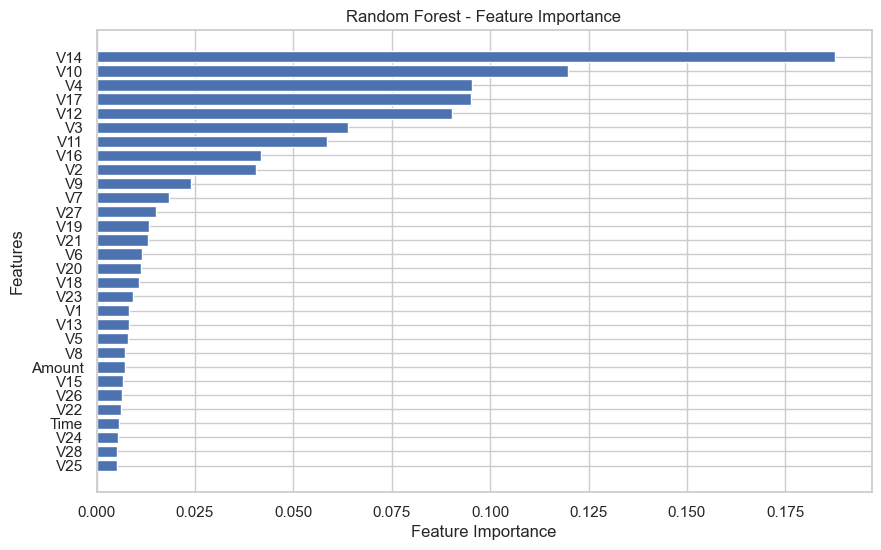

In [121]:
# Plot for Decision Tree
plot_feature_importance(dt_model, X.columns, "Decision Tree")

# Plot for Random Forest
plot_feature_importance(rf_model, X.columns, "Random Forest")

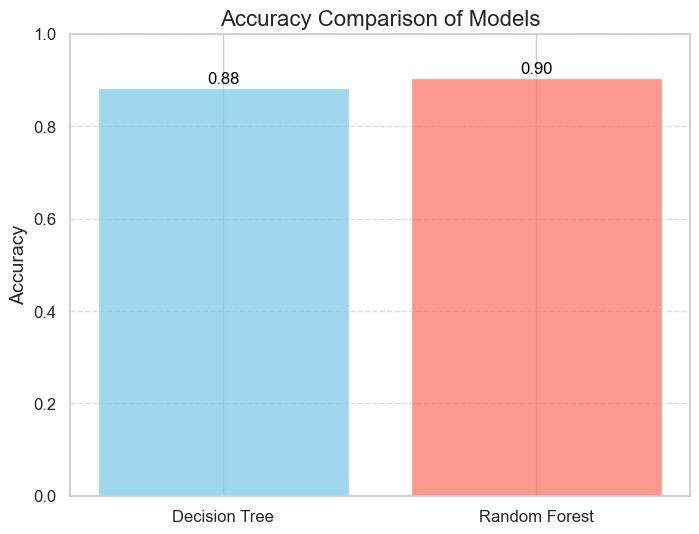

In [123]:
dt_accuracy = accuracy_score(Y_test, dt_predictions)
rf_accuracy = accuracy_score(Y_test, rf_predictions)

# Model names and corresponding accuracies
models = ['Decision Tree', 'Random Forest']
accuracies = [dt_accuracy, rf_accuracy]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'salmon'], alpha=0.8)

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{accuracy:.2f}", ha='center', fontsize=12, color='black')

plt.ylim(0, 1)  
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy Comparison of Models', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()